<a href="https://colab.research.google.com/github/RonitGandhi/PSL-RA/blob/main/Craven_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural Network Models


**Feedforward Neural Network**

The feedforward neural network will take the current inputs and predict the current outputs.

**Autoregressive Neural Network**

The autoregressive neural network will use the current inputs and the previous time step's predicted outputs to predict the current outputs.

## FF AND AR MODELS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
file_path = '/content/craven_data_csv.csv'
data = pd.read_csv(file_path)

# Separate inputs (first 5 columns) and outputs (next 5 columns)
inputs = data.iloc[:, :5].values
outputs = data.iloc[:, 5:].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.2, shuffle=False)

# Normalize the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Define and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

# Make predictions
ff_predictions_scaled = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test_scaled, ff_predictions_scaled)
print(f'Mean Squared Error: {mse}')

# Inverse transform the predictions and actual values
ff_predictions = scaler_y.inverse_transform(ff_predictions_scaled)
y_test = scaler_y.inverse_transform(y_test_scaled)

# Save actual vs predicted values to CSV
results = pd.DataFrame({
    'Actual_1': y_test[:, 0],
    'Predicted_FF_1': ff_predictions[:, 0],
    'Actual_2': y_test[:, 1],
    'Predicted_FF_2': ff_predictions[:, 1],
    'Actual_3': y_test[:, 2],
    'Predicted_FF_3': ff_predictions[:, 2],
    'Actual_4': y_test[:, 3],
    'Predicted_FF_4': ff_predictions[:, 3],
    'Actual_5': y_test[:, 4],
    'Predicted_FF_5': ff_predictions[:, 4]
})

results.to_csv('/mnt/data/actual_vs_predicted.csv', index=False)

# Plotting
plt.figure(figsize=(12, 8))

for i in range(5):
    plt.subplot(3, 2, i+1)
    plt.plot(y_test[:, i], label='Actual')
    plt.plot(ff_predictions[:, i], label='Predicted')
    plt.title(f'Output {i+1}')
    plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/100
151/151 [==============================] - 1s 2ms/step - loss: 0.0693
Epoch 2/100
151/151 [==============================] - 0s 2ms/step - loss: 0.0170
Epoch 3/100
151/151 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 4/100
151/151 [==============================] - 0s 2ms/step - loss: 0.0097
Epoch 5/100
151/151 [==============================] - 0s 2ms/step - loss: 0.0083
Epoch 6/100
151/151 [==============================] - 0s 2ms/step - loss: 0.0071
Epoch 7/100
151/151 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 8/100
151/151 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 9/100
151/151 [==============================] - 0s 2ms/step - loss: 0.0047
Epoch 10/100
151/151 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 11/100
151/151 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 12/100
151/151 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 13/100


Understanding the MATLAB Code and Reference Links
1. Feedforward Neural Network (nn_FF_time.m):
The MATLAB script likely defines a feedforward neural network (FFNN) for time series prediction.
Key points:
Input data consists of the current time step features.
Output data consists of the current time step target values.
The network might include layers like feedforwardnet or similar, with specified training functions.
2. Autoregressive Neural Network (nn_AR_time.m):
The MATLAB script likely defines an autoregressive network (NARX) where the output at the previous time step is used as an input feature.
Key points:
Input data consists of the current time step features and the previous time step target values.
Output data consists of the current time step target values.
The network might include layers like narxnet or similar, with feedback loops for autoregression.

## Gated Recurrent Unit (GRU) Model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

from sklearn.metrics import mean_squared_error
import numpy as np
# 1. Data Preprocessing
data = pd.read_csv('craven_data_csv.csv')
input_cols = ['Time', 'pH', 'T', 'DO', 'F'] + ['G', 'Q', 'L', 'A', 'P']
output_cols = ['G', 'Q', 'L', 'A', 'P']

scaler = MinMaxScaler()
data[input_cols] = scaler.fit_transform(data[input_cols])

X = data[input_cols].values
y = data[output_cols].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input data to have a time step dimension
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# 2. Model Architecture
model = Sequential()
model.add(GRU(64, activation='relu', input_shape=(1, len(input_cols))))
model.add(Dense(5))

# 3. Model Training
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100, batch_size=32)

# 4. Model Testing
test_predictions = []
test_input = X_test[0].reshape(1, 1, -1)

for i in range(len(X_test)):
    if i > 0:
        # Use the actual output from the previous time step as input
        test_input[:, :, len(input_cols)-len(output_cols):] = y_test[i-1]

    pred = model.predict(test_input)
    test_predictions.append(pred)

test_predictions = np.array(test_predictions).squeeze()

predictions_df = pd.DataFrame(test_predictions, columns=output_cols)
predictions_df.to_csv('predictions.csv', index=False)

# 6. Model Evaluation
mse = mean_squared_error(y_test, test_predictions)
print(f'Mean Squared Error: {mse}')

## GRU model with improvements

Epoch 1/200
136/136 [==============================] - 12s 10ms/step - loss: 0.2750 - val_loss: 0.2141 - lr: 0.0010
Epoch 2/200
136/136 [==============================] - 1s 6ms/step - loss: 0.0836 - val_loss: 0.0782 - lr: 0.0010
Epoch 3/200
136/136 [==============================] - 1s 7ms/step - loss: 0.0568 - val_loss: 0.0315 - lr: 0.0010
Epoch 4/200
136/136 [==============================] - 1s 7ms/step - loss: 0.0428 - val_loss: 0.0145 - lr: 0.0010
Epoch 5/200
136/136 [==============================] - 1s 7ms/step - loss: 0.0356 - val_loss: 0.0118 - lr: 0.0010
Epoch 6/200
136/136 [==============================] - 1s 7ms/step - loss: 0.0308 - val_loss: 0.0102 - lr: 0.0010
Epoch 7/200
136/136 [==============================] - 1s 7ms/step - loss: 0.0285 - val_loss: 0.0096 - lr: 0.0010
Epoch 8/200
136/136 [==============================] - 1s 8ms/step - loss: 0.0259 - val_loss: 0.0091 - lr: 0.0010
Epoch 9/200
136/136 [==============================] - 1s 9ms/step - loss: 0.0242 - va

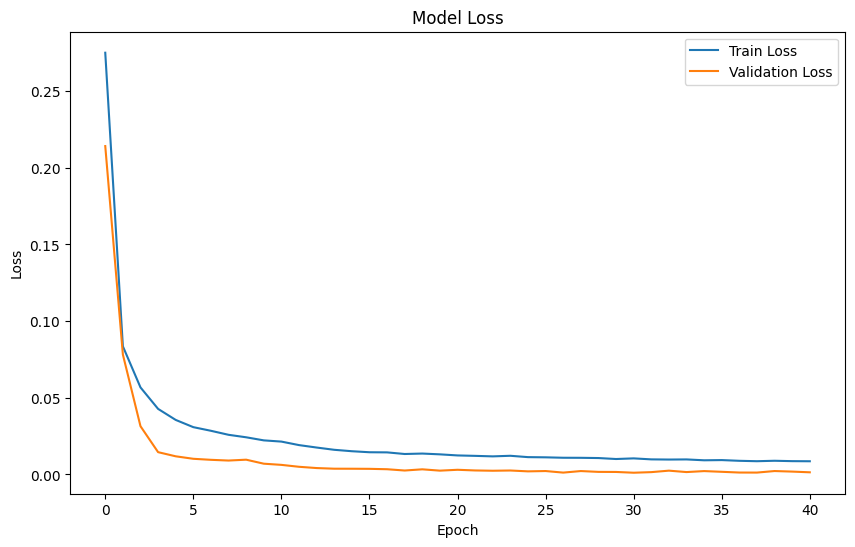

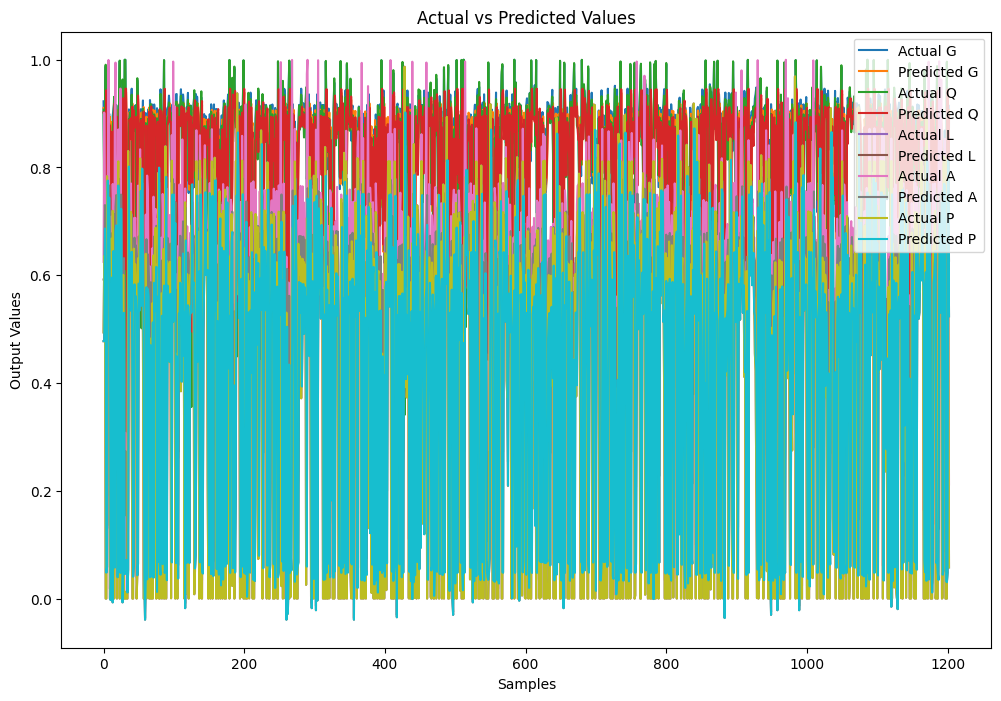

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('craven_data_csv.csv')
input_cols = ['Time', 'pH', 'T', 'DO', 'F'] + ['G', 'Q', 'L', 'A', 'P']
output_cols = ['G', 'Q', 'L', 'A', 'P']

scaler = MinMaxScaler()
data[input_cols] = scaler.fit_transform(data[input_cols])

X = data[input_cols].values
y = data[output_cols].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

model = Sequential()
model.add(GRU(128, activation='relu', return_sequences=True, input_shape=(1, len(input_cols))))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(GRU(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(5))


model.compile(optimizer='adam', loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.1, callbacks=[early_stopping, reduce_lr])

test_predictions = []
test_input = X_test[0].reshape(1, 1, -1)

for i in range(len(X_test)):
    if i > 0:
        test_input[:, :, len(input_cols)-len(output_cols):] = y_test[i-1]

    pred = model.predict(test_input)
    test_predictions.append(pred)

test_predictions = np.array(test_predictions).squeeze()

predictions_df = pd.DataFrame(test_predictions, columns=output_cols)
predictions_df.to_csv('predictions_gru.csv', index=False)

mse = mean_squared_error(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(12, 8))
for i, col in enumerate(output_cols):
    plt.plot(y_test[:, i], label=f'Actual {col}')
    plt.plot(test_predictions[:, i], label=f'Predicted {col}')
plt.title('Actual vs Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Output Values')
plt.legend(loc='upper right')
plt.show()


## Testing Improvement - better graphs

Epoch 1/200
136/136 [==============================] - 13s 25ms/step - loss: 0.3080 - val_loss: 0.1979 - lr: 0.0010
Epoch 2/200
136/136 [==============================] - 3s 21ms/step - loss: 0.0899 - val_loss: 0.0695 - lr: 0.0010
Epoch 3/200
136/136 [==============================] - 2s 15ms/step - loss: 0.0596 - val_loss: 0.0349 - lr: 0.0010
Epoch 4/200
136/136 [==============================] - 1s 7ms/step - loss: 0.0426 - val_loss: 0.0226 - lr: 0.0010
Epoch 5/200
136/136 [==============================] - 1s 7ms/step - loss: 0.0347 - val_loss: 0.0095 - lr: 0.0010
Epoch 6/200
136/136 [==============================] - 1s 7ms/step - loss: 0.0299 - val_loss: 0.0094 - lr: 0.0010
Epoch 7/200
136/136 [==============================] - 1s 7ms/step - loss: 0.0253 - val_loss: 0.0081 - lr: 0.0010
Epoch 8/200
136/136 [==============================] - 1s 7ms/step - loss: 0.0235 - val_loss: 0.0091 - lr: 0.0010
Epoch 9/200
136/136 [==============================] - 1s 7ms/step - loss: 0.0217 - 

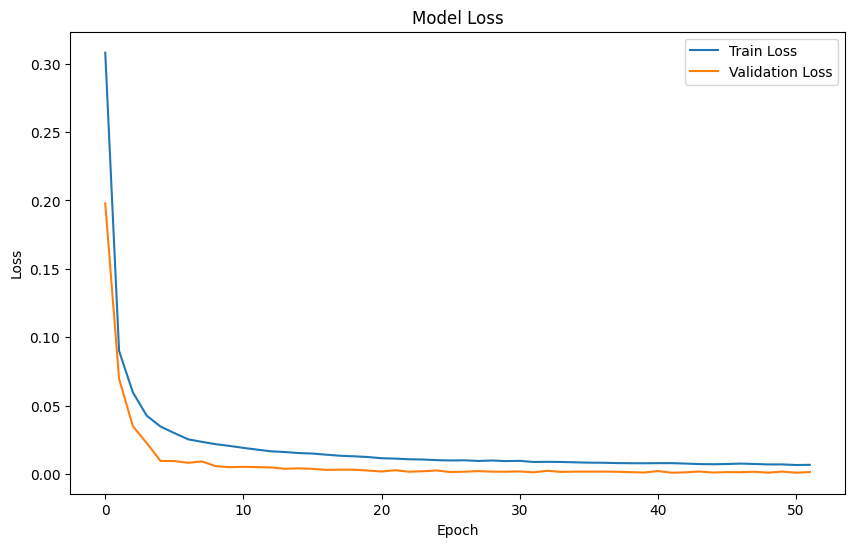

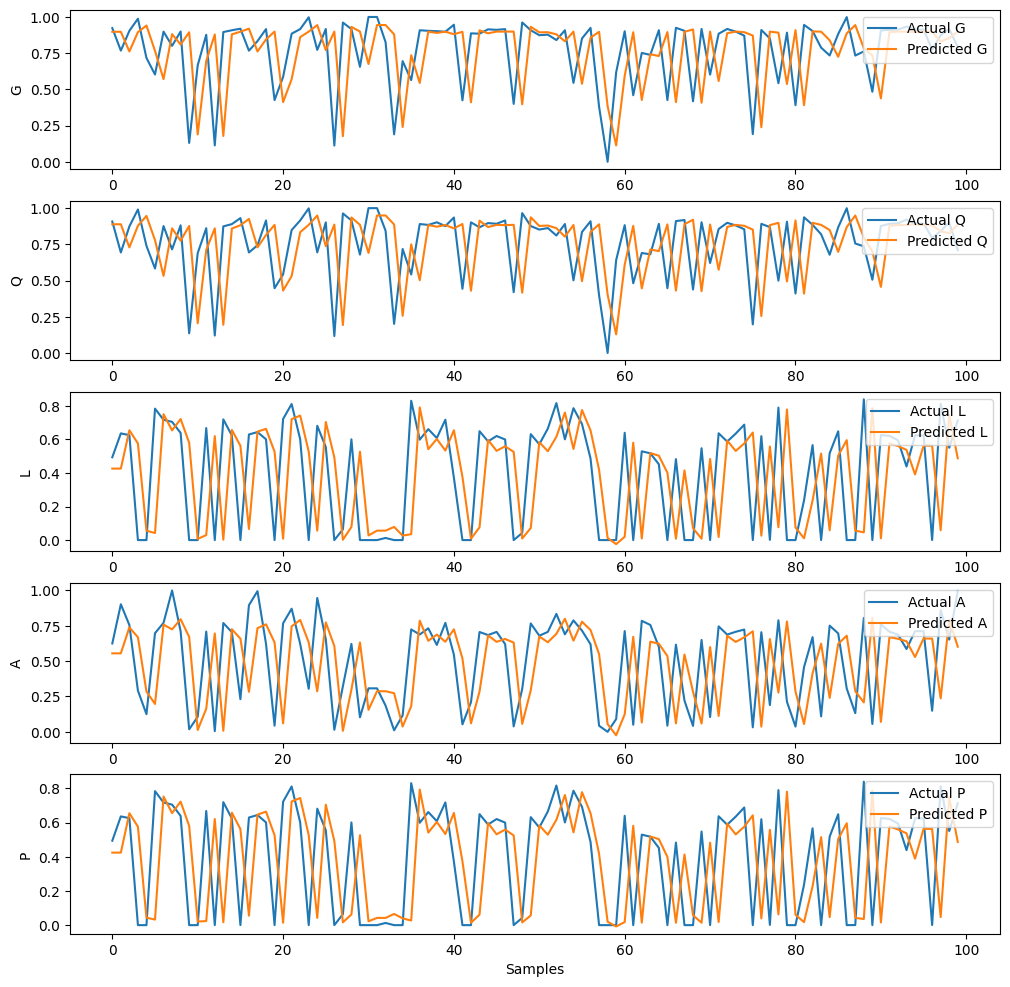

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# 1. Data Preprocessing
data = pd.read_csv('craven_data_csv.csv')
input_cols = ['Time', 'pH', 'T', 'DO', 'F'] + ['G', 'Q', 'L', 'A', 'P']
output_cols = ['G', 'Q', 'L', 'A', 'P']

scaler = MinMaxScaler()
data[input_cols] = scaler.fit_transform(data[input_cols])

X = data[input_cols].values
y = data[output_cols].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input data to have a time step dimension
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# 2. Model Architecture
model = Sequential()
model.add(GRU(128, activation='relu', return_sequences=True, input_shape=(1, len(input_cols))))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(GRU(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(5))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.1, callbacks=[early_stopping, reduce_lr])

# 4. Model Testing
test_predictions = []
test_input = X_test[0].reshape(1, 1, -1)

for i in range(len(X_test)):
    if i > 0:
        test_input[:, :, len(input_cols)-len(output_cols):] = y_test[i-1]

    pred = model.predict(test_input)
    test_predictions.append(pred)

test_predictions = np.array(test_predictions).squeeze()

# 5. Save Predictions and Comparison with Actual Values
comparison_df = pd.DataFrame(data={'Actual_' + col: y_test[:, i] for i, col in enumerate(output_cols)})
for i, col in enumerate(output_cols):
    comparison_df['Predicted_' + col] = test_predictions[:, i]

comparison_df.to_csv('comparison_gru.csv', index=False)

# 6. Model Evaluation
mse = mean_squared_error(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Improved visualization for actual vs predicted values with a smaller x-axis range
plt.figure(figsize=(12, 12))
sample_range = 100  # Change this value to zoom in/out
for i, col in enumerate(output_cols):
    plt.subplot(len(output_cols), 1, i+1)
    plt.plot(y_test[:sample_range, i], label=f'Actual {col}')
    plt.plot(test_predictions[:sample_range, i], label=f'Predicted {col}')
    plt.ylabel(col)
    plt.legend(loc='upper right')
plt.xlabel('Samples')
plt.show()


## Improvement - better r2 <- Correct Model

Epoch 1/300
136/136 [==============================] - 9s 19ms/step - loss: 0.4511 - val_loss: 0.2121 - lr: 0.0010
Epoch 2/300
136/136 [==============================] - 2s 15ms/step - loss: 0.1474 - val_loss: 0.0827 - lr: 0.0010
Epoch 3/300
136/136 [==============================] - 2s 15ms/step - loss: 0.0907 - val_loss: 0.0473 - lr: 0.0010
Epoch 4/300
136/136 [==============================] - 2s 18ms/step - loss: 0.0646 - val_loss: 0.0280 - lr: 0.0010
Epoch 5/300
136/136 [==============================] - 3s 25ms/step - loss: 0.0511 - val_loss: 0.0235 - lr: 0.0010
Epoch 6/300
136/136 [==============================] - 2s 15ms/step - loss: 0.0430 - val_loss: 0.0185 - lr: 0.0010
Epoch 7/300
136/136 [==============================] - 2s 15ms/step - loss: 0.0375 - val_loss: 0.0181 - lr: 0.0010
Epoch 8/300
136/136 [==============================] - 2s 15ms/step - loss: 0.0332 - val_loss: 0.0133 - lr: 0.0010
Epoch 9/300
136/136 [==============================] - 2s 15ms/step - loss: 0.02

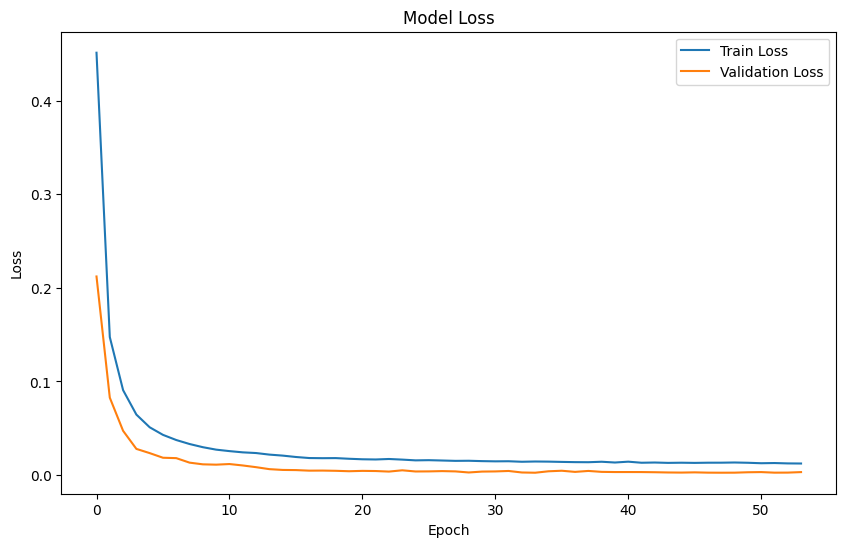

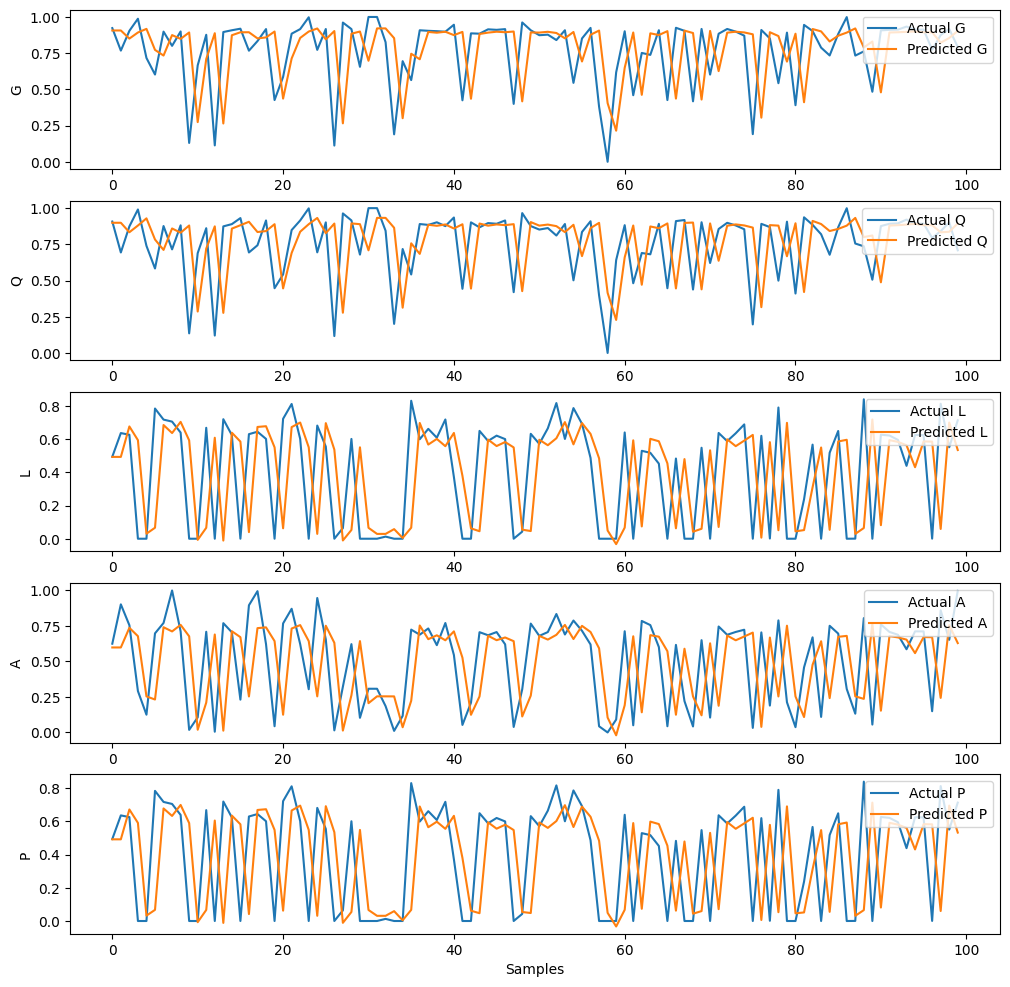

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# 1. Data Preprocessing
data = pd.read_csv('craven_data_csv.csv')
input_cols = ['Time', 'pH', 'T', 'DO', 'F'] + ['G', 'Q', 'L', 'A', 'P']
output_cols = ['G', 'Q', 'L', 'A', 'P']

scaler = MinMaxScaler()
data[input_cols] = scaler.fit_transform(data[input_cols])

X = data[input_cols].values
y = data[output_cols].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input data to have a time step dimension
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# 2. Model Architecture
model = Sequential()
model.add(GRU(256, activation='relu', return_sequences=True, input_shape=(1, len(input_cols))))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(GRU(128, activation='relu', return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(GRU(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(5))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.001)

history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.1, callbacks=[early_stopping, reduce_lr])

# 4. Model Testing
test_predictions = []
test_input = X_test[0].reshape(1, 1, -1)

for i in range(len(X_test)):
    if i > 0:
        test_input[:, :, len(input_cols)-len(output_cols):] = y_test[i-1]

    pred = model.predict(test_input)
    test_predictions.append(pred)

test_predictions = np.array(test_predictions).squeeze()

# 5. Save Predictions and Comparison with Actual Values
comparison_df = pd.DataFrame(data={'Actual_' + col: y_test[:, i] for i, col in enumerate(output_cols)})
for i, col in enumerate(output_cols):
    comparison_df['Predicted_' + col] = test_predictions[:, i]

comparison_df.to_csv('comparison_gru_improved_1.csv', index=False)

# 6. Model Evaluation
mse = mean_squared_error(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Improved visualization for actual vs predicted values with a smaller x-axis range
plt.figure(figsize=(12, 12))
sample_range = 100  # Change this value to zoom in/out
for i, col in enumerate(output_cols):
    plt.subplot(len(output_cols), 1, i+1)
    plt.plot(y_test[:sample_range, i], label=f'Actual {col}')
    plt.plot(test_predictions[:sample_range, i], label=f'Predicted {col}')
    plt.ylabel(col)
    plt.legend(loc='upper right')
plt.xlabel('Samples')
plt.show()


## Further improved R2

Epoch 1/300
136/136 [==============================] - 12s 35ms/step - loss: 0.4382 - val_loss: 0.1845 - lr: 0.0010
Epoch 2/300
136/136 [==============================] - 5s 33ms/step - loss: 0.1532 - val_loss: 0.0770 - lr: 0.0010
Epoch 3/300
136/136 [==============================] - 4s 32ms/step - loss: 0.0976 - val_loss: 0.0702 - lr: 0.0010
Epoch 4/300
136/136 [==============================] - 4s 29ms/step - loss: 0.0741 - val_loss: 0.0459 - lr: 0.0010
Epoch 5/300
136/136 [==============================] - 3s 24ms/step - loss: 0.0628 - val_loss: 0.0337 - lr: 0.0010
Epoch 6/300
136/136 [==============================] - 2s 17ms/step - loss: 0.0527 - val_loss: 0.0277 - lr: 0.0010
Epoch 7/300
136/136 [==============================] - 3s 24ms/step - loss: 0.0464 - val_loss: 0.0260 - lr: 0.0010
Epoch 8/300
136/136 [==============================] - 2s 14ms/step - loss: 0.0427 - val_loss: 0.0227 - lr: 0.0010
Epoch 9/300
136/136 [==============================] - 2s 14ms/step - loss: 0.0

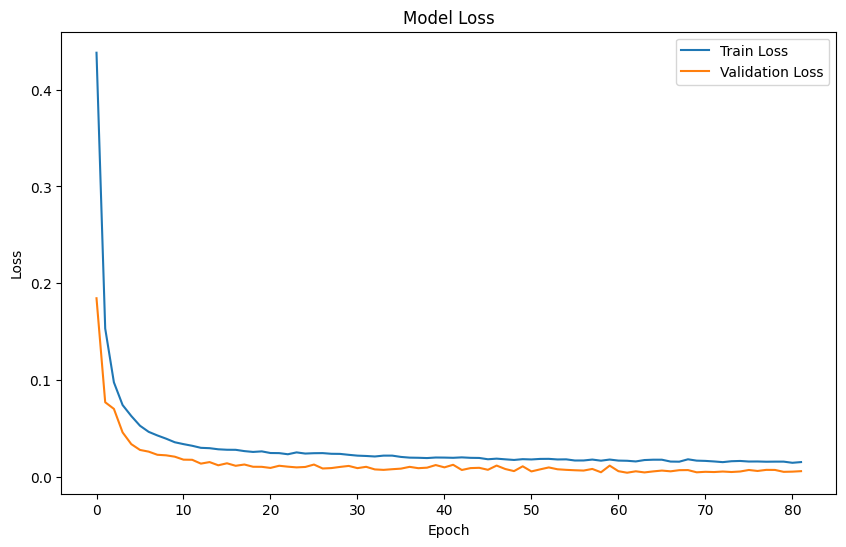

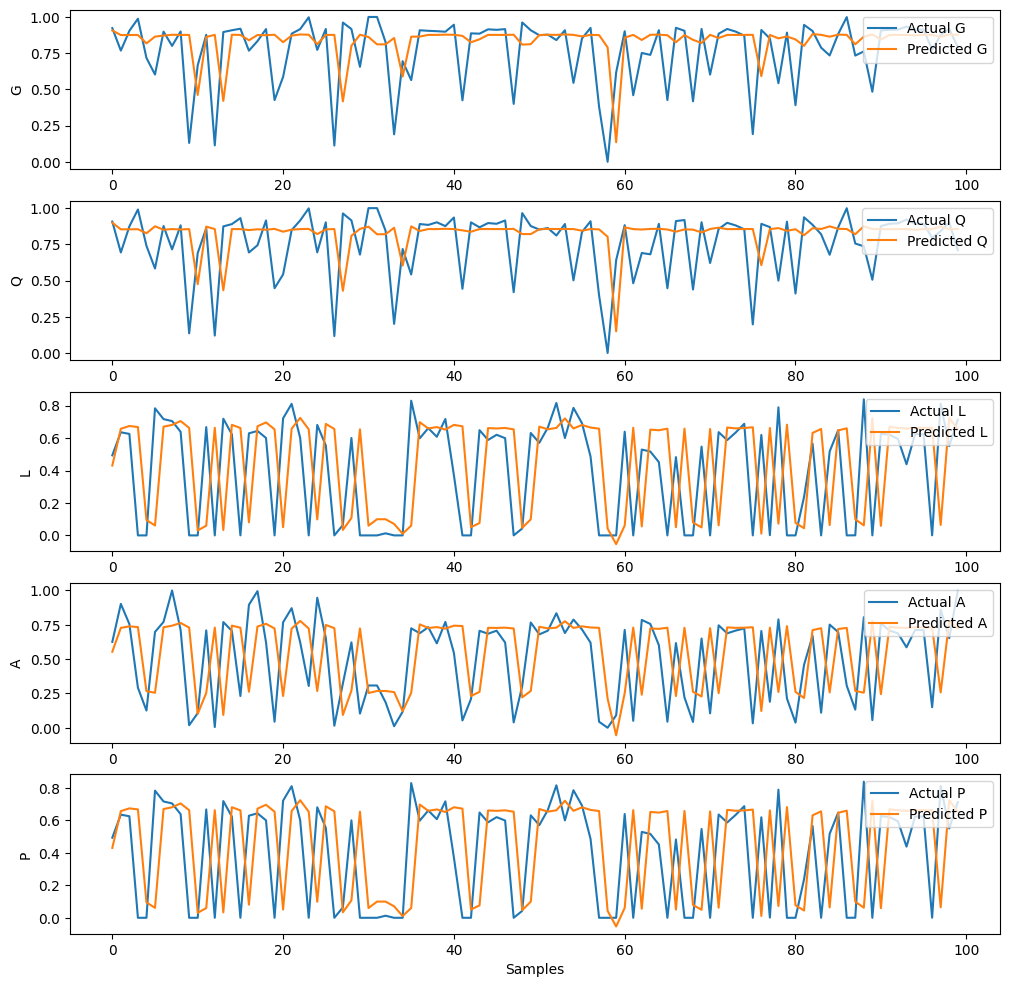

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data_path = 'craven_data_csv.csv'
data = pd.read_csv(data_path)
input_cols = ['Time', 'pH', 'T', 'DO', 'F']
output_cols = ['G', 'Q', 'L', 'A', 'P']

# Normalize the data
scaler = MinMaxScaler()
data[input_cols + output_cols] = scaler.fit_transform(data[input_cols + output_cols])

X = data[input_cols].values
y = data[output_cols].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input data to have a time step dimension
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the GRU model
model = Sequential()
model.add(GRU(256, activation='relu', return_sequences=True, input_shape=(1, len(input_cols))))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(GRU(128, activation='relu', return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(GRU(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(len(output_cols)))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.001)

history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.1, callbacks=[early_stopping, reduce_lr])

# Model Testing
test_predictions = []
test_input = X_test[0].reshape(1, 1, -1)

for i in range(len(X_test)):
    if i > 0:
        test_input[:, :, len(input_cols)-len(output_cols):] = y_test[i-1]

    pred = model.predict(test_input)
    test_predictions.append(pred)

test_predictions = np.array(test_predictions).squeeze()

# Save Predictions and Comparison with Actual Values
comparison_df = pd.DataFrame(data={'Actual_' + col: y_test[:, i] for i, col in enumerate(output_cols)})
for i, col in enumerate(output_cols):
    comparison_df['Predicted_' + col] = test_predictions[:, i]

comparison_df.to_csv('comparison_gru_improved.csv', index=False)

# Model Evaluation
mse = mean_squared_error(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Improved visualization for actual vs predicted values with a smaller x-axis range
plt.figure(figsize=(12, 12))
sample_range = 100  # Change this value to zoom in/out
for i, col in enumerate(output_cols):
    plt.subplot(len(output_cols), 1, i+1)
    plt.plot(y_test[:sample_range, i], label=f'Actual {col}')
    plt.plot(test_predictions[:sample_range, i], label=f'Predicted {col}')
    plt.ylabel(col)
    plt.legend(loc='upper right')
plt.xlabel('Samples')
plt.show()


## Only with 4 cols - Updated Script for Sequence Input


Epoch 1/300
136/136 [==============================] - 18s 92ms/step - loss: 0.2438 - val_loss: 0.0925 - lr: 0.0010
Epoch 2/300
136/136 [==============================] - 12s 89ms/step - loss: 0.1103 - val_loss: 0.0728 - lr: 0.0010
Epoch 3/300
136/136 [==============================] - 12s 90ms/step - loss: 0.0886 - val_loss: 0.0656 - lr: 0.0010
Epoch 4/300
136/136 [==============================] - 11s 81ms/step - loss: 0.0795 - val_loss: 0.0638 - lr: 0.0010
Epoch 5/300
136/136 [==============================] - 12s 87ms/step - loss: 0.0739 - val_loss: 0.0571 - lr: 0.0010
Epoch 6/300
136/136 [==============================] - 12s 90ms/step - loss: 0.0694 - val_loss: 0.0552 - lr: 0.0010
Epoch 7/300
136/136 [==============================] - 12s 90ms/step - loss: 0.0664 - val_loss: 0.0540 - lr: 0.0010
Epoch 8/300
136/136 [==============================] - 12s 90ms/step - loss: 0.0636 - val_loss: 0.0549 - lr: 0.0010
Epoch 9/300
136/136 [==============================] - 12s 91ms/step - l

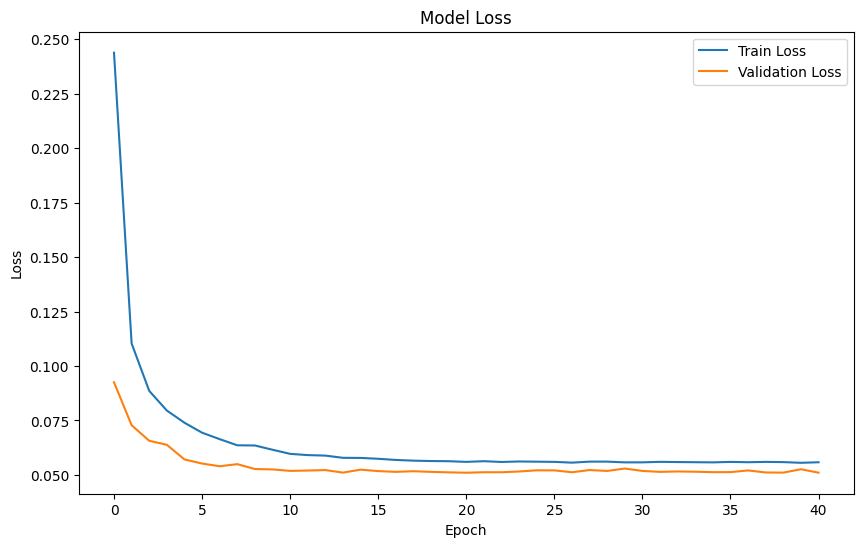

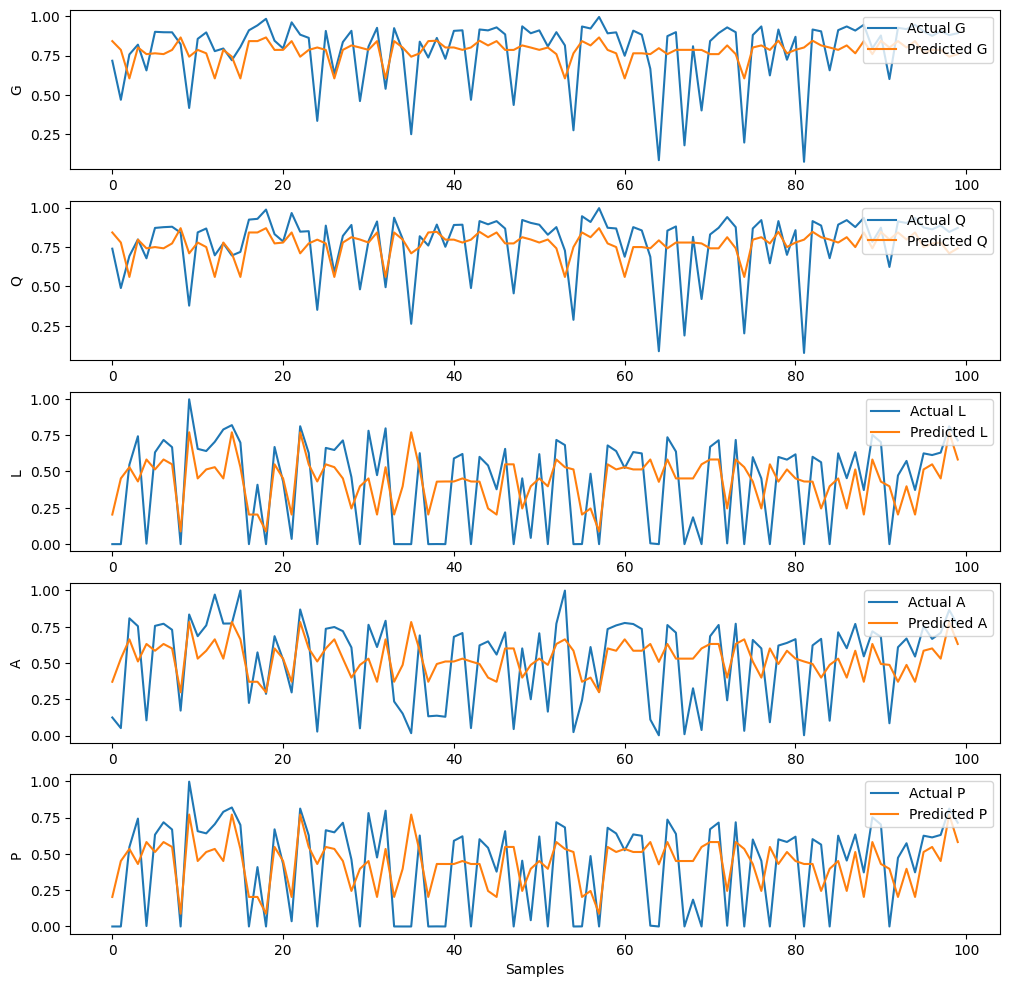

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data_path = 'craven_data_csv.csv'
data = pd.read_csv(data_path)
input_cols = ['pH', 'T', 'DO', 'F']
output_cols = ['G', 'Q', 'L', 'A', 'P']

# Normalize the data
scaler = MinMaxScaler()
data[input_cols + output_cols] = scaler.fit_transform(data[input_cols + output_cols])

# Function to create sequences
def create_sequences(data, input_cols, output_cols, time_steps=5):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[input_cols].iloc[i:i+time_steps].values)
        y.append(data[output_cols].iloc[i+time_steps].values)
    return np.array(X), np.array(y)

time_steps = 5
X, y = create_sequences(data, input_cols, output_cols, time_steps)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the GRU model
model = Sequential()
model.add(GRU(512, activation='relu', return_sequences=True, input_shape=(time_steps, len(input_cols))))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(GRU(256, activation='relu', return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(GRU(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(len(output_cols)))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.001)

history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.1, callbacks=[early_stopping, reduce_lr])

# Model Testing
test_predictions = []
for i in range(len(X_test)):
    test_input = X_test[i].reshape(1, time_steps, len(input_cols))
    pred = model.predict(test_input)
    test_predictions.append(pred)

test_predictions = np.array(test_predictions).squeeze()

# Save Predictions and Comparison with Actual Values
comparison_df = pd.DataFrame(data={'Actual_' + col: y_test[:, i] for i, col in enumerate(output_cols)})
for i, col in enumerate(output_cols):
    comparison_df['Predicted_' + col] = test_predictions[:, i]

comparison_df.to_csv('comparison_gru_improved_sequence.csv', index=False)

# Model Evaluation
mse = mean_squared_error(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Improved visualization for actual vs predicted values with a smaller x-axis range
plt.figure(figsize=(12, 12))
sample_range = 100  # Change this value to zoom in/out
for i, col in enumerate(output_cols):
    plt.subplot(len(output_cols), 1, i+1)
    plt.plot(y_test[:sample_range, i], label=f'Actual {col}')
    plt.plot(test_predictions[:sample_range, i], label=f'Predicted {col}')
    plt.ylabel(col)
    plt.legend(loc='upper right')
plt.xlabel('Samples')
plt.show()


## Try the attention mechanism


Epoch 1/300
136/136 [==============================] - 23s 120ms/step - loss: 0.1699 - val_loss: 0.0805 - lr: 0.0010
Epoch 2/300
136/136 [==============================] - 14s 105ms/step - loss: 0.0884 - val_loss: 0.0785 - lr: 0.0010
Epoch 3/300
136/136 [==============================] - 12s 92ms/step - loss: 0.0757 - val_loss: 0.0735 - lr: 0.0010
Epoch 4/300
136/136 [==============================] - 12s 88ms/step - loss: 0.0715 - val_loss: 0.0598 - lr: 0.0010
Epoch 5/300
136/136 [==============================] - 12s 87ms/step - loss: 0.0679 - val_loss: 0.0528 - lr: 0.0010
Epoch 6/300
136/136 [==============================] - 13s 96ms/step - loss: 0.0652 - val_loss: 0.0525 - lr: 0.0010
Epoch 7/300
136/136 [==============================] - 13s 96ms/step - loss: 0.0625 - val_loss: 0.0519 - lr: 0.0010
Epoch 8/300
136/136 [==============================] - 13s 94ms/step - loss: 0.0609 - val_loss: 0.0529 - lr: 0.0010
Epoch 9/300
136/136 [==============================] - 13s 94ms/step -

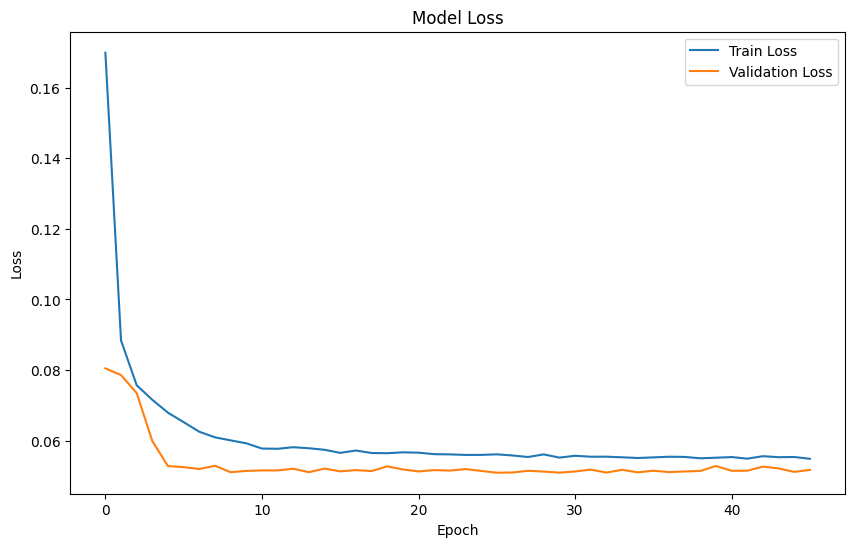

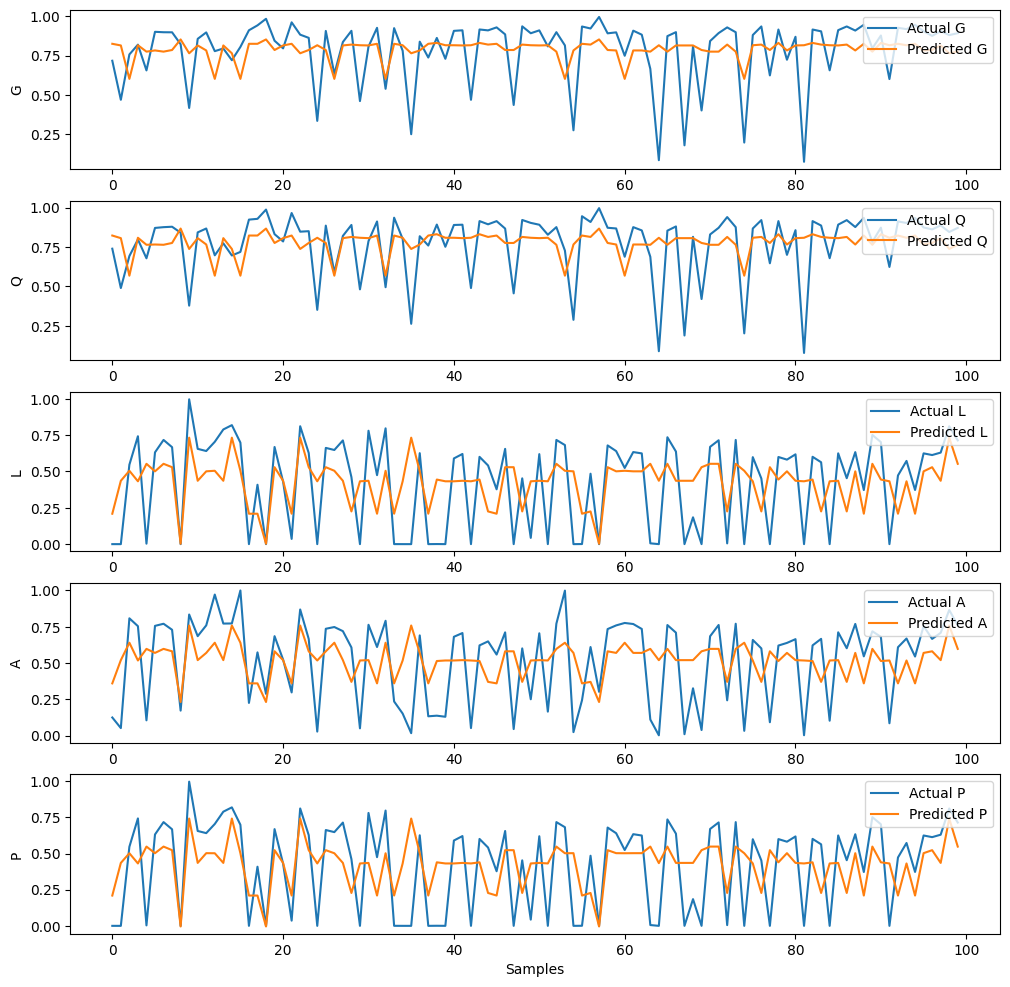

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization, Input, Layer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K

# Define the Attention Layer
class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name='attention_weight', shape=(input_shape[-1], input_shape[-1]),
                                 initializer='glorot_uniform', trainable=True)
        self.b = self.add_weight(name='attention_bias', shape=(input_shape[-1],),
                                 initializer='zeros', trainable=True)
        super(Attention, self).build(input_shape)

    def call(self, x):
        e = K.tanh(K.dot(x, self.W) + self.b)
        a = K.softmax(e, axis=1)
        output = x * a
        return K.sum(output, axis=1)

# Load the data
data_path = 'craven_data_csv.csv'
data = pd.read_csv(data_path)
input_cols = ['pH', 'T', 'DO', 'F']
output_cols = ['G', 'Q', 'L', 'A', 'P']

# Normalize the data
scaler = MinMaxScaler()
data[input_cols + output_cols] = scaler.fit_transform(data[input_cols + output_cols])

# Function to create sequences
def create_sequences(data, input_cols, output_cols, time_steps=5):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[input_cols].iloc[i:i+time_steps].values)
        y.append(data[output_cols].iloc[i+time_steps].values)
    return np.array(X), np.array(y)

time_steps = 5
X, y = create_sequences(data, input_cols, output_cols, time_steps)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the GRU model with Attention
input_layer = Input(shape=(time_steps, len(input_cols)))
gru_out = GRU(512, activation='relu', return_sequences=True)(input_layer)
gru_out = BatchNormalization()(gru_out)
gru_out = Dropout(0.3)(gru_out)
gru_out = GRU(256, activation='relu', return_sequences=True)(gru_out)
gru_out = BatchNormalization()(gru_out)
gru_out = Dropout(0.3)(gru_out)
gru_out = GRU(128, activation='relu', return_sequences=True)(gru_out)
gru_out = BatchNormalization()(gru_out)
attention_out = Attention()(gru_out)
dense_out = Dense(128, activation='relu')(attention_out)
dense_out = Dropout(0.3)(dense_out)
dense_out = Dense(64, activation='relu')(dense_out)
dense_out = Dropout(0.3)(dense_out)
output_layer = Dense(len(output_cols))(dense_out)

model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.001)

history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.1, callbacks=[early_stopping, reduce_lr])

# Model Testing
test_predictions = []
for i in range(len(X_test)):
    test_input = X_test[i].reshape(1, time_steps, len(input_cols))
    pred = model.predict(test_input)
    test_predictions.append(pred)

test_predictions = np.array(test_predictions).squeeze()

# Save Predictions and Comparison with Actual Values
comparison_df = pd.DataFrame(data={'Actual_' + col: y_test[:, i] for i, col in enumerate(output_cols)})
for i, col in enumerate(output_cols):
    comparison_df['Predicted_' + col] = test_predictions[:, i]

comparison_df.to_csv('comparison_gru_attention.csv', index=False)

# Model Evaluation
mse = mean_squared_error(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Improved visualization for actual vs predicted values with a smaller x-axis range
plt.figure(figsize=(12, 12))
sample_range = 100  # Change this value to zoom in/out
for i, col in enumerate(output_cols):
    plt.subplot(len(output_cols), 1, i+1)
    plt.plot(y_test[:sample_range, i], label=f'Actual {col}')
    plt.plot(test_predictions[:sample_range, i], label=f'Predicted {col}')
    plt.ylabel(col)
    plt.legend(loc='upper right')
plt.xlabel('Samples')
plt.show()


## Transformer Model

Epoch 1/100
136/136 [==============================] - 20s 76ms/step - loss: 0.2007 - val_loss: 0.0710 - lr: 0.0010
Epoch 2/100
136/136 [==============================] - 6s 44ms/step - loss: 0.1056 - val_loss: 0.0703 - lr: 0.0010
Epoch 3/100
136/136 [==============================] - 8s 55ms/step - loss: 0.0868 - val_loss: 0.0693 - lr: 0.0010
Epoch 4/100
136/136 [==============================] - 6s 44ms/step - loss: 0.0808 - val_loss: 0.0677 - lr: 0.0010
Epoch 5/100
136/136 [==============================] - 7s 54ms/step - loss: 0.0769 - val_loss: 0.0670 - lr: 0.0010
Epoch 6/100
136/136 [==============================] - 6s 44ms/step - loss: 0.0738 - val_loss: 0.0664 - lr: 0.0010
Epoch 7/100
136/136 [==============================] - 7s 53ms/step - loss: 0.0720 - val_loss: 0.0652 - lr: 0.0010
Epoch 8/100
136/136 [==============================] - 6s 47ms/step - loss: 0.0707 - val_loss: 0.0638 - lr: 0.0010
Epoch 9/100
136/136 [==============================] - 8s 56ms/step - loss: 0.0

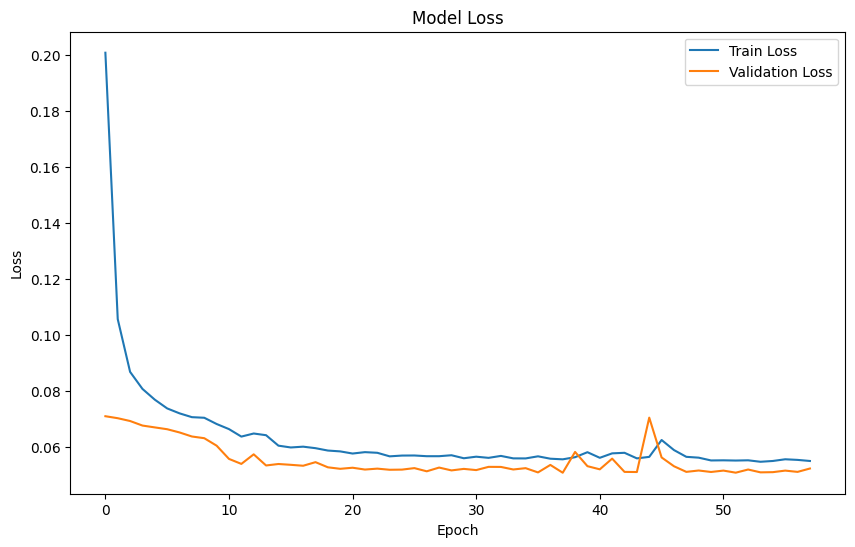

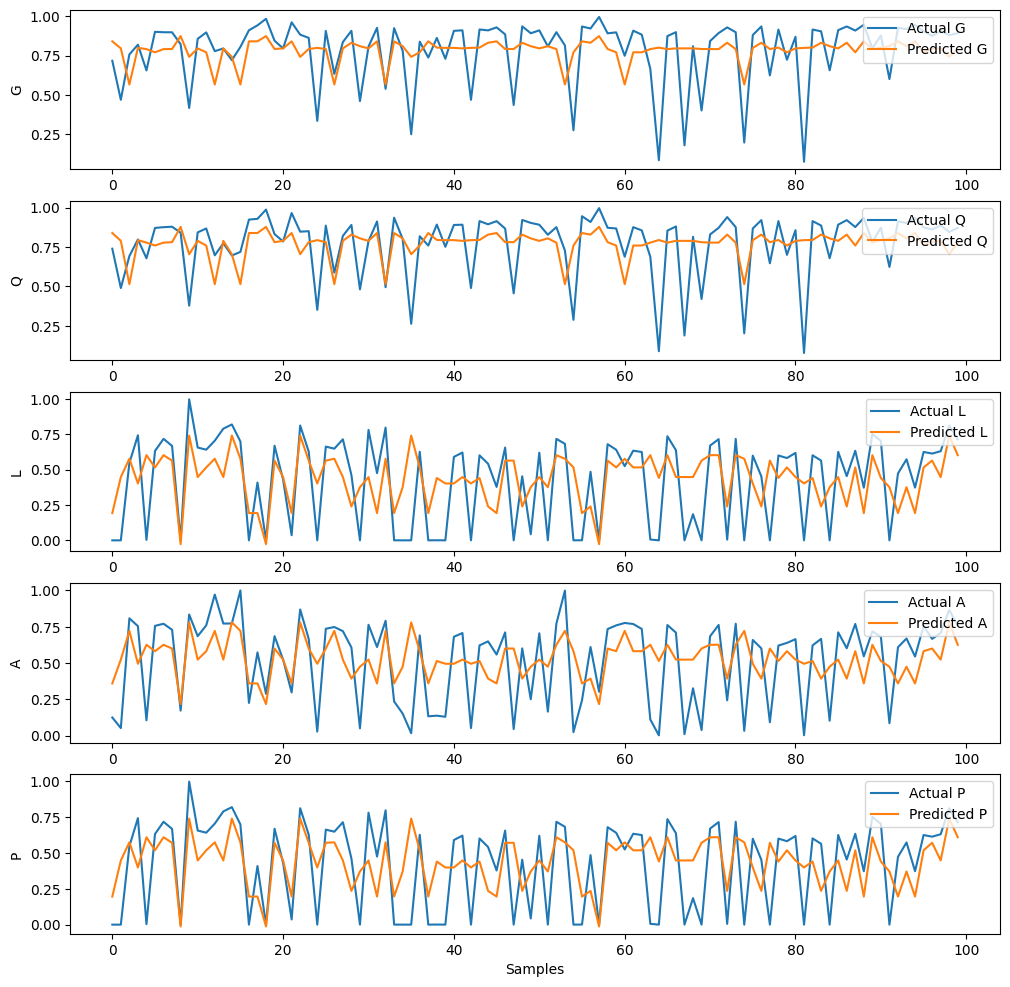

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention, Add
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data_path = 'craven_data_csv.csv'
data = pd.read_csv(data_path)
input_cols = ['pH', 'T', 'DO', 'F']  # Time is implicit
output_cols = ['G', 'Q', 'L', 'A', 'P']

# Normalize the data
scaler = MinMaxScaler()
data[input_cols + output_cols] = scaler.fit_transform(data[input_cols + output_cols])

# Function to create sequences
def create_sequences(data, input_cols, output_cols, time_steps=5):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[input_cols].iloc[i:i+time_steps].values)
        y.append(data[output_cols].iloc[i+time_steps].values)
    return np.array(X), np.array(y)

time_steps = 5
X, y = create_sequences(data, input_cols, output_cols, time_steps)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Transformer model
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    res = Add()([x, inputs])

    x = Dense(ff_dim, activation="relu")(res)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    return Add()([x, res])

input_layer = Input(shape=(time_steps, len(input_cols)))
x = transformer_encoder(input_layer, head_size=256, num_heads=4, ff_dim=4, dropout=0.2)
x = transformer_encoder(x, head_size=256, num_heads=4, ff_dim=4, dropout=0.2)
x = transformer_encoder(x, head_size=256, num_heads=4, ff_dim=4, dropout=0.2)
x = transformer_encoder(x, head_size=256, num_heads=4, ff_dim=4, dropout=0.2)
x = Dense(100, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(len(output_cols))(x)
output_layer = x[:, -1, :]  # Get the last time step output

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='mse')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.001)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stopping, reduce_lr])

# Model Testing
test_predictions = model.predict(X_test)

# Save Predictions and Comparison with Actual Values
comparison_df = pd.DataFrame(data={'Actual_' + col: y_test[:, i] for i, col in enumerate(output_cols)})
for i, col in enumerate(output_cols):
    comparison_df['Predicted_' + col] = test_predictions[:, i]

comparison_df.to_csv('comparison_transformer.csv', index=False)

# Model Evaluation
mse = mean_squared_error(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Improved visualization for actual vs predicted values with a smaller x-axis range
plt.figure(figsize=(12, 12))
sample_range = 100  # Change this value to zoom in/out
for i, col in enumerate(output_cols):
    plt.subplot(len(output_cols), 1, i+1)
    plt.plot(y_test[:sample_range, i], label=f'Actual {col}')
    plt.plot(test_predictions[:sample_range, i], label=f'Predicted {col}')
    plt.ylabel(col)
    plt.legend(loc='upper right')
plt.xlabel('Samples')
plt.show()


## Ensemble Technique - GRU and transformer model

Epoch 1/300
136/136 [==============================] - 12s 50ms/step - loss: 0.4078 - val_loss: 0.1521 - lr: 0.0010
Epoch 2/300
136/136 [==============================] - 4s 32ms/step - loss: 0.1656 - val_loss: 0.0847 - lr: 0.0010
Epoch 3/300
136/136 [==============================] - 4s 33ms/step - loss: 0.1172 - val_loss: 0.0695 - lr: 0.0010
Epoch 4/300
136/136 [==============================] - 6s 46ms/step - loss: 0.0964 - val_loss: 0.0705 - lr: 0.0010
Epoch 5/300
136/136 [==============================] - 4s 33ms/step - loss: 0.0839 - val_loss: 0.0707 - lr: 0.0010
Epoch 6/300
136/136 [==============================] - 5s 34ms/step - loss: 0.0772 - val_loss: 0.0628 - lr: 0.0010
Epoch 7/300
136/136 [==============================] - 6s 45ms/step - loss: 0.0733 - val_loss: 0.0587 - lr: 0.0010
Epoch 8/300
136/136 [==============================] - 4s 33ms/step - loss: 0.0692 - val_loss: 0.0581 - lr: 0.0010
Epoch 9/300
136/136 [==============================] - 6s 41ms/step - loss: 0.0

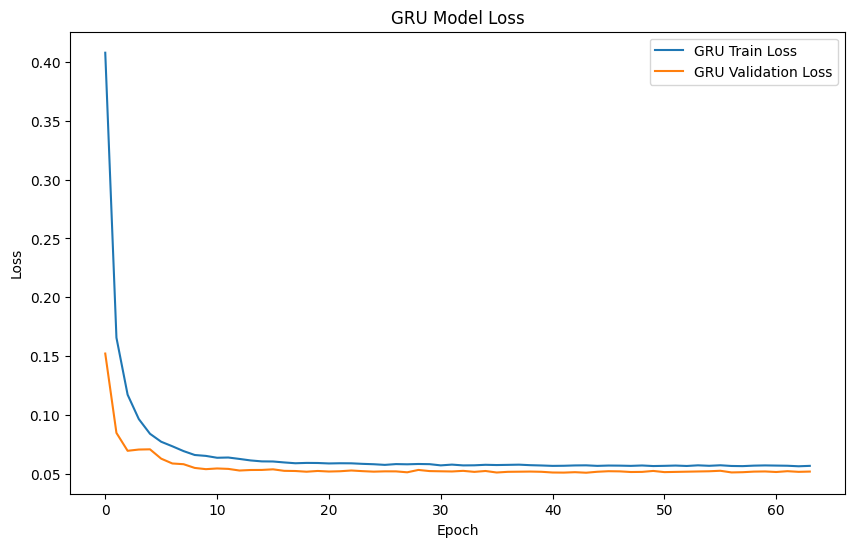

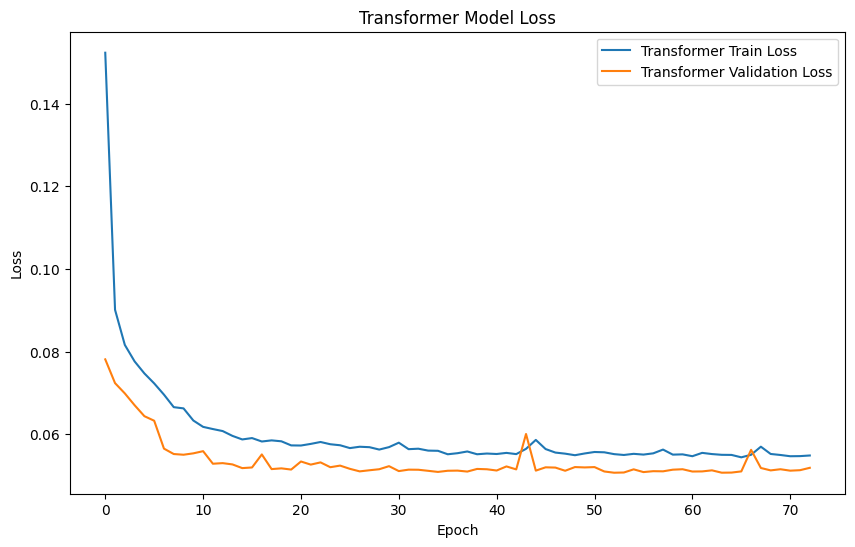

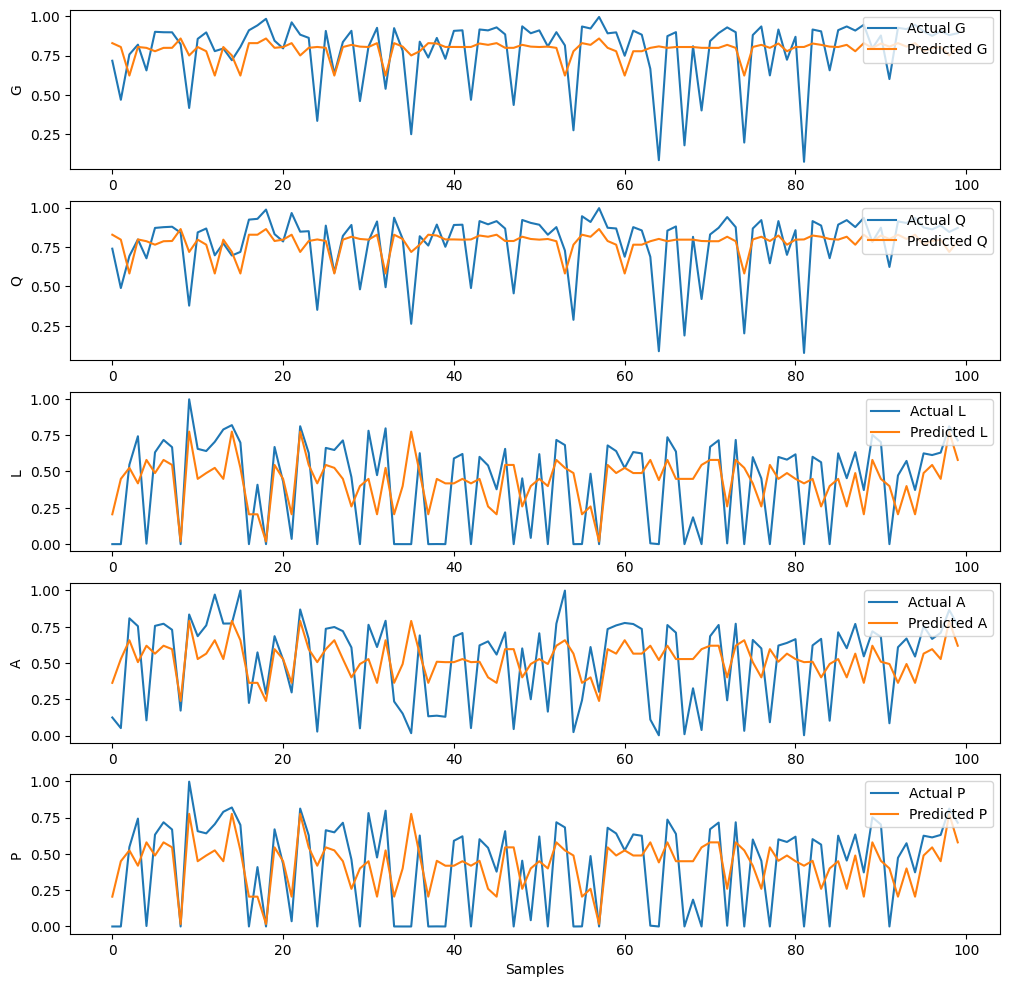

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization, Input, LayerNormalization, MultiHeadAttention, Add
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data_path = 'craven_data_csv.csv'
data = pd.read_csv(data_path)
input_cols = ['pH', 'T', 'DO', 'F']  # Time is implicit
output_cols = ['G', 'Q', 'L', 'A', 'P']

# Normalize the data
scaler = MinMaxScaler()
data[input_cols + output_cols] = scaler.fit_transform(data[input_cols + output_cols])

# Function to create sequences
def create_sequences(data, input_cols, output_cols, time_steps=5):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[input_cols].iloc[i:i+time_steps].values)
        y.append(data[output_cols].iloc[i+time_steps].values)
    return np.array(X), np.array(y)

time_steps = 5
X, y = create_sequences(data, input_cols, output_cols, time_steps)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the GRU model
gru_model = Sequential()
gru_model.add(GRU(256, activation='relu', return_sequences=True, input_shape=(time_steps, len(input_cols))))
gru_model.add(BatchNormalization())
gru_model.add(Dropout(0.4))
gru_model.add(GRU(128, activation='relu', return_sequences=True))
gru_model.add(BatchNormalization())
gru_model.add(Dropout(0.4))
gru_model.add(GRU(64, activation='relu'))
gru_model.add(BatchNormalization())
gru_model.add(Dense(64, activation='relu'))
gru_model.add(Dropout(0.4))
gru_model.add(Dense(32, activation='relu'))
gru_model.add(Dropout(0.4))
gru_model.add(Dense(len(output_cols)))

gru_model.compile(optimizer='adam', loss='mse')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.001)

history_gru = gru_model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.1, callbacks=[early_stopping, reduce_lr])

# Define the Transformer model
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    res = Add()([x, inputs])

    x = Dense(ff_dim, activation="relu")(res)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    return Add()([x, res])

input_layer = Input(shape=(time_steps, len(input_cols)))
x = transformer_encoder(input_layer, head_size=256, num_heads=4, ff_dim=4, dropout=0.2)
x = transformer_encoder(x, head_size=256, num_heads=4, ff_dim=4, dropout=0.2)
x = transformer_encoder(x, head_size=256, num_heads=4, ff_dim=4, dropout=0.2)
x = transformer_encoder(x, head_size=256, num_heads=4, ff_dim=4, dropout=0.2)
x = Dense(100, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(len(output_cols))(x)
output_layer = x[:, -1, :]  # Get the last time step output

transformer_model = Model(inputs=input_layer, outputs=output_layer)
transformer_model.compile(optimizer='adam', loss='mse')

history_transformer = transformer_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stopping, reduce_lr])

# Model Testing
gru_predictions = gru_model.predict(X_test)
transformer_predictions = transformer_model.predict(X_test)

# Ensemble Predictions
ensemble_predictions = (gru_predictions + transformer_predictions) / 2

# Save Predictions and Comparison with Actual Values
comparison_df = pd.DataFrame(data={'Actual_' + col: y_test[:, i] for i, col in enumerate(output_cols)})
for i, col in enumerate(output_cols):
    comparison_df['Predicted_' + col] = ensemble_predictions[:, i]

comparison_df.to_csv('comparison_ensemble.csv', index=False)

# Model Evaluation
mse = mean_squared_error(y_test, ensemble_predictions)
mae = mean_absolute_error(y_test, ensemble_predictions)
r2 = r2_score(y_test, ensemble_predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

# Plot training & validation loss values for GRU
plt.figure(figsize=(10, 6))
plt.plot(history_gru.history['loss'], label='GRU Train Loss')
plt.plot(history_gru.history['val_loss'], label='GRU Validation Loss')
plt.title('GRU Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Plot training & validation loss values for Transformer
plt.figure(figsize=(10, 6))
plt.plot(history_transformer.history['loss'], label='Transformer Train Loss')
plt.plot(history_transformer.history['val_loss'], label='Transformer Validation Loss')
plt.title('Transformer Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Improved visualization for actual vs predicted values with a smaller x-axis range
plt.figure(figsize=(12, 12))
sample_range = 100  # Change this value to zoom in/out
for i, col in enumerate(output_cols):
    plt.subplot(len(output_cols), 1, i+1)
    plt.plot(y_test[:sample_range, i], label=f'Actual {col}')
    plt.plot(ensemble_predictions[:sample_range, i], label=f'Predicted {col}')
    plt.ylabel(col)
    plt.legend(loc='upper right')
plt.xlabel('Samples')
plt.show()


## Stacked Ensemble

Epoch 1/300
136/136 [==============================] - 12s 37ms/step - loss: 0.5201 - val_loss: 0.1258 - lr: 0.0010
Epoch 2/300
136/136 [==============================] - 6s 44ms/step - loss: 0.1677 - val_loss: 0.0834 - lr: 0.0010
Epoch 3/300
136/136 [==============================] - 5s 34ms/step - loss: 0.1210 - val_loss: 0.0734 - lr: 0.0010
Epoch 4/300
136/136 [==============================] - 4s 33ms/step - loss: 0.1030 - val_loss: 0.0719 - lr: 0.0010
Epoch 5/300
136/136 [==============================] - 6s 46ms/step - loss: 0.0907 - val_loss: 0.0627 - lr: 0.0010
Epoch 6/300
136/136 [==============================] - 4s 33ms/step - loss: 0.0840 - val_loss: 0.0615 - lr: 0.0010
Epoch 7/300
136/136 [==============================] - 5s 34ms/step - loss: 0.0777 - val_loss: 0.0565 - lr: 0.0010
Epoch 8/300
136/136 [==============================] - 7s 48ms/step - loss: 0.0745 - val_loss: 0.0569 - lr: 0.0010
Epoch 9/300
136/136 [==============================] - 5s 33ms/step - loss: 0.0

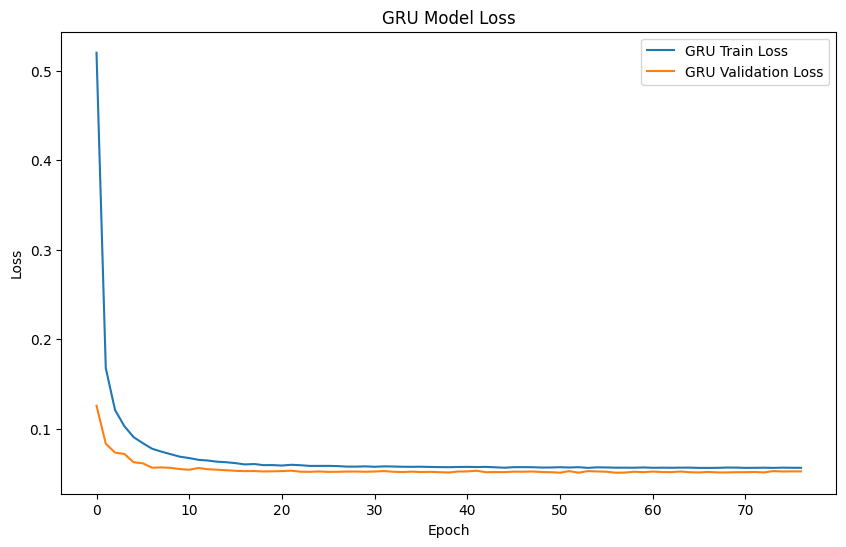

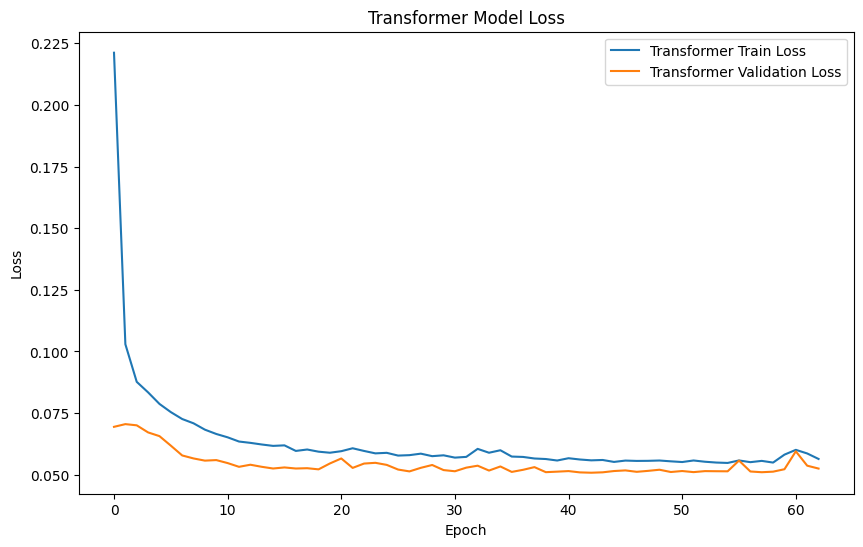

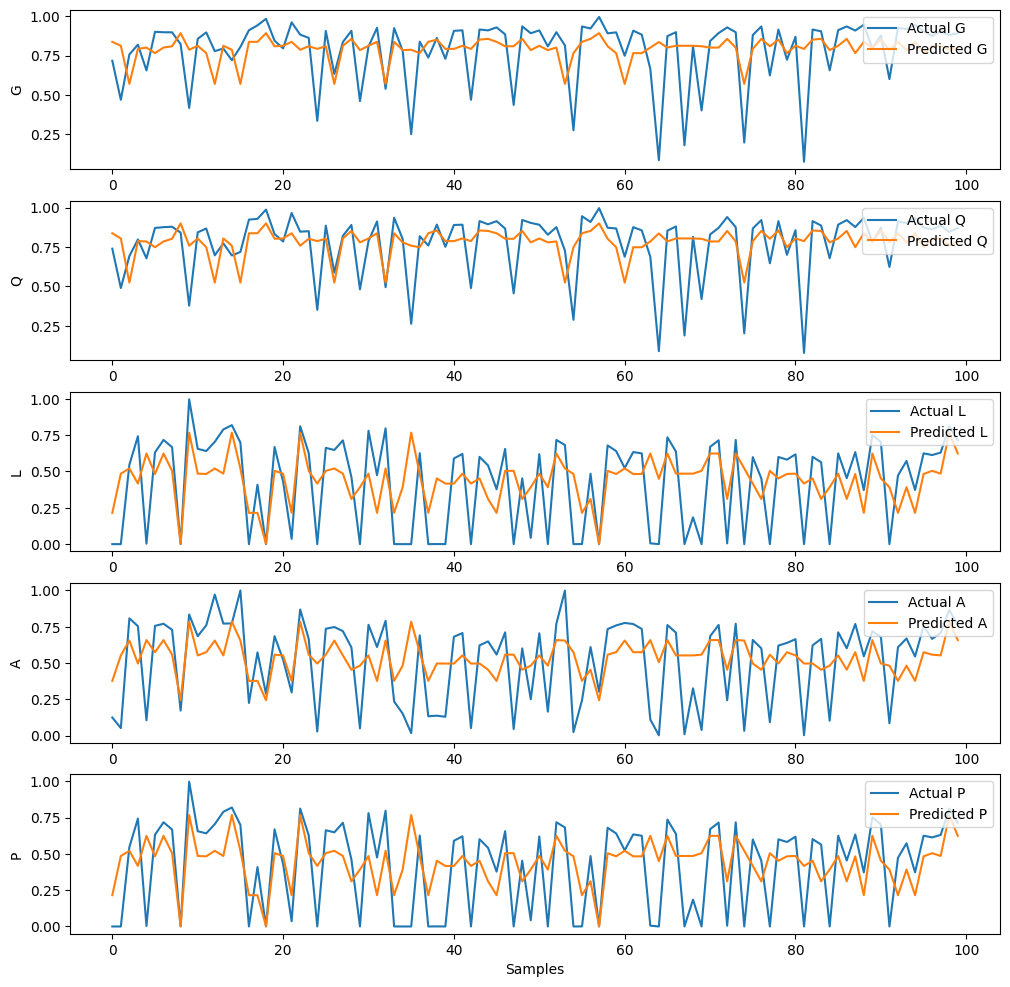

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization, Input, LayerNormalization, MultiHeadAttention, Add
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data_path = 'craven_data_csv.csv'
data = pd.read_csv(data_path)
input_cols = ['pH', 'T', 'DO', 'F']  # Time is implicit
output_cols = ['G', 'Q', 'L', 'A', 'P']

# Normalize the data
scaler = MinMaxScaler()
data[input_cols + output_cols] = scaler.fit_transform(data[input_cols + output_cols])

# Function to create sequences
def create_sequences(data, input_cols, output_cols, time_steps=5):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[input_cols].iloc[i:i+time_steps].values)
        y.append(data[output_cols].iloc[i+time_steps].values)
    return np.array(X), np.array(y)

time_steps = 5
X, y = create_sequences(data, input_cols, output_cols, time_steps)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the GRU model
gru_model = Sequential()
gru_model.add(GRU(256, activation='relu', return_sequences=True, input_shape=(time_steps, len(input_cols))))
gru_model.add(BatchNormalization())
gru_model.add(Dropout(0.4))
gru_model.add(GRU(128, activation='relu', return_sequences=True))
gru_model.add(BatchNormalization())
gru_model.add(Dropout(0.4))
gru_model.add(GRU(64, activation='relu'))
gru_model.add(BatchNormalization())
gru_model.add(Dense(64, activation='relu'))
gru_model.add(Dropout(0.4))
gru_model.add(Dense(32, activation='relu'))
gru_model.add(Dropout(0.4))
gru_model.add(Dense(len(output_cols)))

gru_model.compile(optimizer='adam', loss='mse')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.001)

history_gru = gru_model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.1, callbacks=[early_stopping, reduce_lr])

# Define the Transformer model
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    res = Add()([x, inputs])

    x = Dense(ff_dim, activation="relu")(res)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    return Add()([x, res])

input_layer = Input(shape=(time_steps, len(input_cols)))
x = transformer_encoder(input_layer, head_size=256, num_heads=4, ff_dim=4, dropout=0.2)
x = transformer_encoder(x, head_size=256, num_heads=4, ff_dim=4, dropout=0.2)
x = transformer_encoder(x, head_size=256, num_heads=4, ff_dim=4, dropout=0.2)
x = transformer_encoder(x, head_size=256, num_heads=4, ff_dim=4, dropout=0.2)
x = Dense(100, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(len(output_cols))(x)
output_layer = x[:, -1, :]  # Get the last time step output

transformer_model = Model(inputs=input_layer, outputs=output_layer)
transformer_model.compile(optimizer='adam', loss='mse')

history_transformer = transformer_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stopping, reduce_lr])

# Model Testing
gru_predictions = gru_model.predict(X_test)
transformer_predictions = transformer_model.predict(X_test)

# Combine Predictions for Meta-Model Training
combined_predictions = np.concatenate([gru_predictions, transformer_predictions], axis=1)

# Train Meta-Model
meta_model = LinearRegression()
meta_model.fit(combined_predictions, y_test)

# Meta-Model Predictions
meta_predictions = meta_model.predict(combined_predictions)

# Save Predictions and Comparison with Actual Values
comparison_df = pd.DataFrame(data={'Actual_' + col: y_test[:, i] for i, col in enumerate(output_cols)})
for i, col in enumerate(output_cols):
    comparison_df['Predicted_' + col] = meta_predictions[:, i]

comparison_df.to_csv('comparison_stacked_ensemble.csv', index=False)

# Model Evaluation
mse = mean_squared_error(y_test, meta_predictions)
mae = mean_absolute_error(y_test, meta_predictions)
r2 = r2_score(y_test, meta_predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

# Plot training & validation loss values for GRU
plt.figure(figsize=(10, 6))
plt.plot(history_gru.history['loss'], label='GRU Train Loss')
plt.plot(history_gru.history['val_loss'], label='GRU Validation Loss')
plt.title('GRU Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Plot training & validation loss values for Transformer
plt.figure(figsize=(10, 6))
plt.plot(history_transformer.history['loss'], label='Transformer Train Loss')
plt.plot(history_transformer.history['val_loss'], label='Transformer Validation Loss')
plt.title('Transformer Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Improved visualization for actual vs predicted values with a smaller x-axis range
plt.figure(figsize=(12, 12))
sample_range = 100  # Change this value to zoom in/out
for i, col in enumerate(output_cols):
    plt.subplot(len(output_cols), 1, i+1)
    plt.plot(y_test[:sample_range, i], label=f'Actual {col}')
    plt.plot(meta_predictions[:sample_range, i], label=f'Predicted {col}')
    plt.ylabel(col)
    plt.legend(loc='upper right')
plt.xlabel('Samples')
plt.show()


## LSTM MODEL WITH TIME


Epoch 1/300
136/136 [==============================] - 9s 34ms/step - loss: 1.2032 - val_loss: 0.3033 - lr: 0.0010
Epoch 2/300
136/136 [==============================] - 6s 42ms/step - loss: 0.3503 - val_loss: 0.1553 - lr: 0.0010
Epoch 3/300
136/136 [==============================] - 4s 31ms/step - loss: 0.1765 - val_loss: 0.0773 - lr: 0.0010
Epoch 4/300
136/136 [==============================] - 4s 31ms/step - loss: 0.1109 - val_loss: 0.0486 - lr: 0.0010
Epoch 5/300
136/136 [==============================] - 6s 44ms/step - loss: 0.0809 - val_loss: 0.0369 - lr: 0.0010
Epoch 6/300
136/136 [==============================] - 4s 31ms/step - loss: 0.0641 - val_loss: 0.0366 - lr: 0.0010
Epoch 7/300
136/136 [==============================] - 4s 31ms/step - loss: 0.0537 - val_loss: 0.0359 - lr: 0.0010
Epoch 8/300
136/136 [==============================] - 6s 43ms/step - loss: 0.0472 - val_loss: 0.0293 - lr: 0.0010
Epoch 9/300
136/136 [==============================] - 4s 31ms/step - loss: 0.03

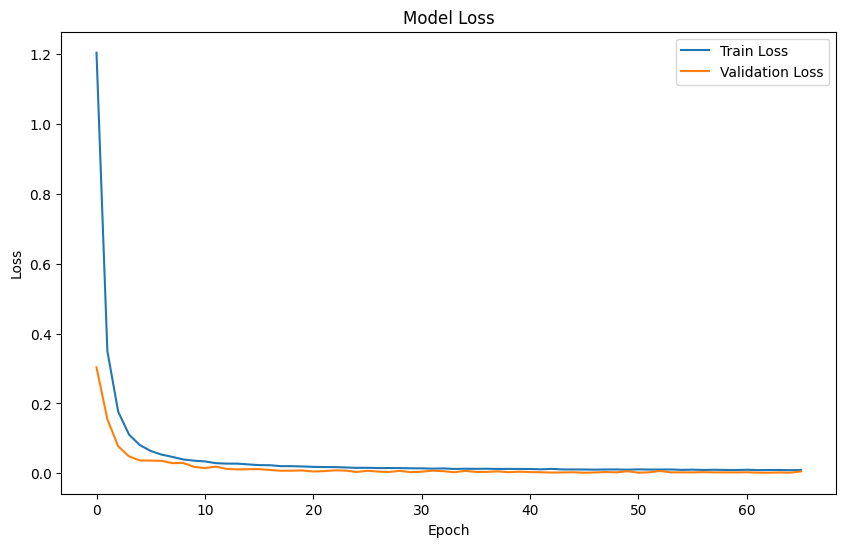

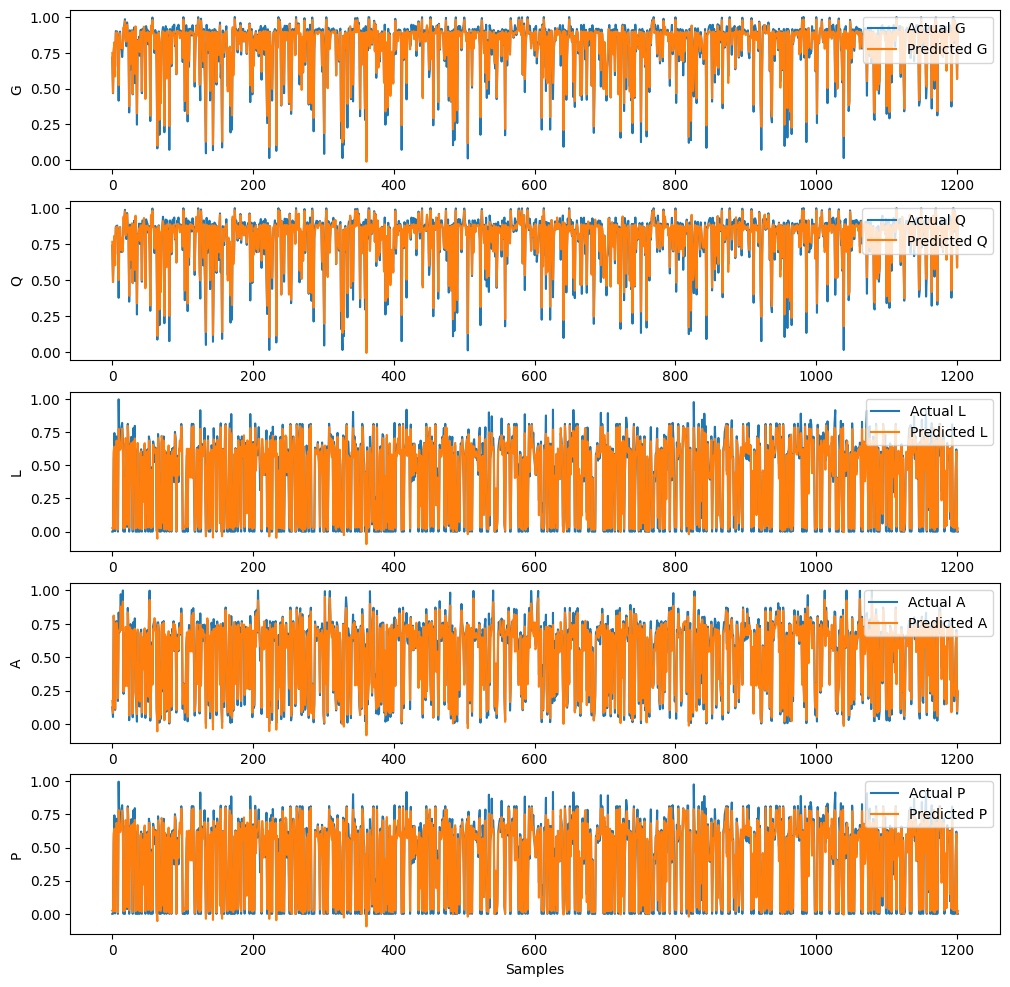

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data_path = 'craven_data_csv.csv'
data = pd.read_csv(data_path)
input_cols = ['Time', 'pH', 'T', 'DO', 'F']
output_cols = ['G', 'Q', 'L', 'A', 'P']

# Normalize the data
scaler = MinMaxScaler()
data[input_cols + output_cols] = scaler.fit_transform(data[input_cols + output_cols])

X = data[input_cols].values
y = data[output_cols].values

# Create sequences
def create_sequences(X, y, time_steps=5):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 5
X, y = create_sequences(X, y, time_steps)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LSTM model
model = Sequential()
model.add(LSTM(256, activation='relu', return_sequences=True, input_shape=(time_steps, len(input_cols))))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(LSTM(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(len(output_cols)))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.001)

history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.1, callbacks=[early_stopping, reduce_lr])

# Model Testing
test_predictions = model.predict(X_test)

# Save Predictions and Comparison with Actual Values
comparison_df = pd.DataFrame(data={'Actual_' + col: y_test[:, i] for i, col in enumerate(output_cols)})
for i, col in enumerate(output_cols):
    comparison_df['Predicted_' + col] = test_predictions[:, i]

comparison_df.to_csv('comparison_lstm.csv', index=False)

# Model Evaluation
mse = mean_squared_error(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Improved visualization for actual vs predicted values
plt.figure(figsize=(12, 12))
sample_range = len(X_test)  # Plot all test samples
for i, col in enumerate(output_cols):
    plt.subplot(len(output_cols), 1, i+1)
    plt.plot(y_test[:sample_range, i], label=f'Actual {col}')
    plt.plot(test_predictions[:sample_range, i], label=f'Predicted {col}')
    plt.ylabel(col)
    plt.legend(loc='upper right')
plt.xlabel('Samples')
plt.show()


## Updated LSTM model - without Time

Epoch 1/300
135/135 [==============================] - 25s 146ms/step - loss: 3.0173 - val_loss: 2.1680 - lr: 0.0010
Epoch 2/300
135/135 [==============================] - 17s 128ms/step - loss: 1.8653 - val_loss: 1.5035 - lr: 0.0010
Epoch 3/300
135/135 [==============================] - 18s 133ms/step - loss: 1.2527 - val_loss: 0.9879 - lr: 0.0010
Epoch 4/300
135/135 [==============================] - 17s 129ms/step - loss: 0.8078 - val_loss: 0.6330 - lr: 0.0010
Epoch 5/300
135/135 [==============================] - 20s 150ms/step - loss: 0.5061 - val_loss: 0.3945 - lr: 0.0010
Epoch 6/300
135/135 [==============================] - 18s 130ms/step - loss: 0.3146 - val_loss: 0.2438 - lr: 0.0010
Epoch 7/300
135/135 [==============================] - 17s 129ms/step - loss: 0.2031 - val_loss: 0.1579 - lr: 0.0010
Epoch 8/300
135/135 [==============================] - 17s 127ms/step - loss: 0.1377 - val_loss: 0.1098 - lr: 0.0010
Epoch 9/300
135/135 [==============================] - 20s 146ms

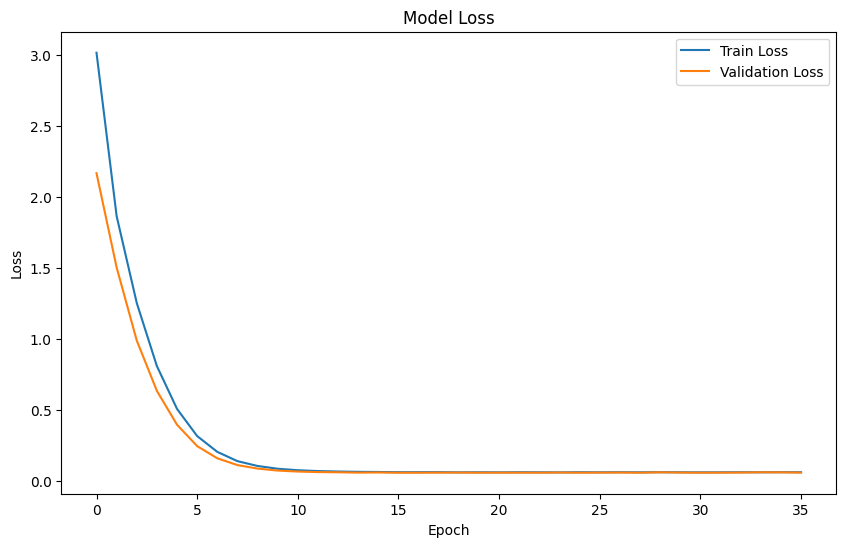

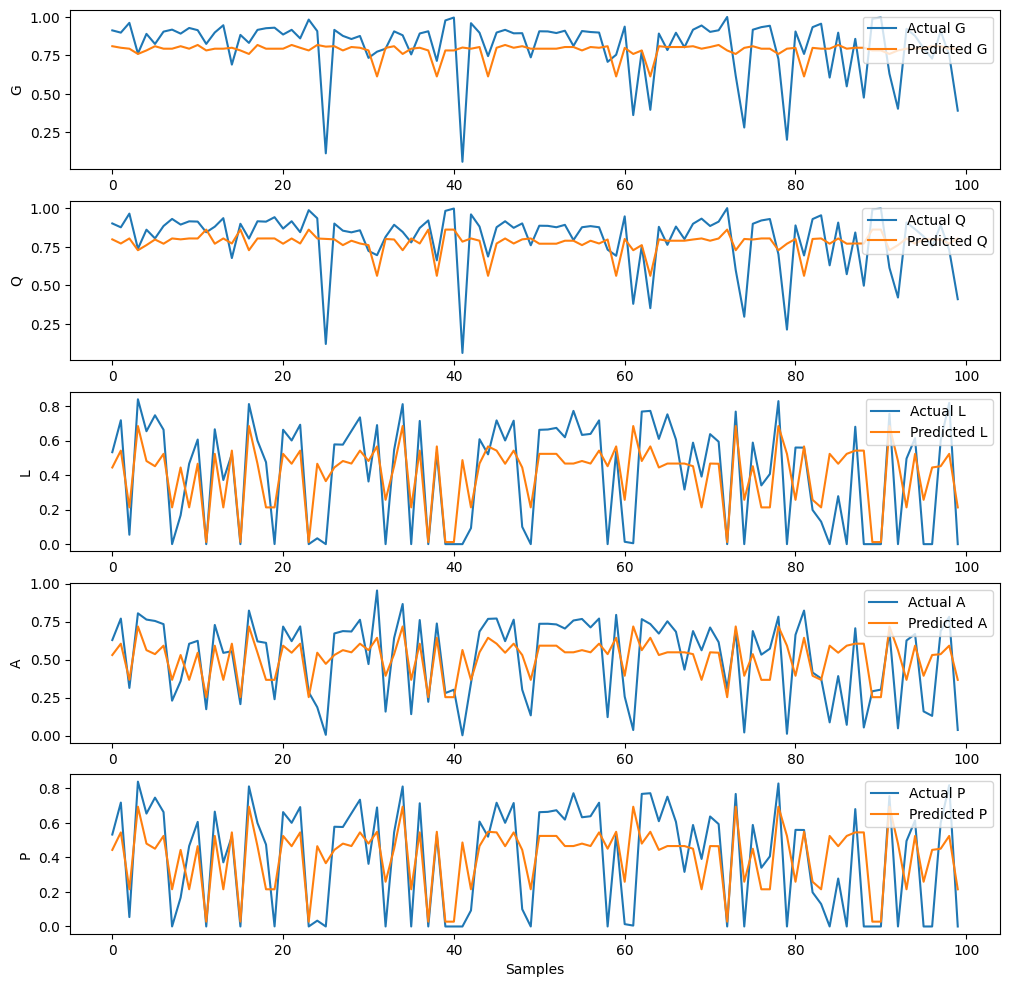

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data_path = 'craven_data_csv.csv'
data = pd.read_csv(data_path)
input_cols = ['pH', 'T', 'DO', 'F']  # Exclude 'Time'
output_cols = ['G', 'Q', 'L', 'A', 'P']

# Normalize the data
scaler = MinMaxScaler()
data[input_cols + output_cols] = scaler.fit_transform(data[input_cols + output_cols])

X = data[input_cols].values
y = data[output_cols].values

# Create sequences
def create_sequences(X, y, time_steps=10):  # Increased time steps
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X, y = create_sequences(X, y, time_steps)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(256, activation='relu', return_sequences=True), input_shape=(time_steps, len(input_cols))))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Bidirectional(LSTM(128, activation='relu')))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu', kernel_regularizer='l2'))  # Added L2 regularization
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu', kernel_regularizer='l2'))  # Added L2 regularization
model.add(Dropout(0.4))
model.add(Dense(len(output_cols)))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.001)

history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.1, callbacks=[early_stopping, reduce_lr])

# Model Testing
test_predictions = model.predict(X_test)

# Save Predictions and Comparison with Actual Values
comparison_df = pd.DataFrame(data={'Actual_' + col: y_test[:, i] for i, col in enumerate(output_cols)})
for i, col in enumerate(output_cols):
    comparison_df['Predicted_' + col] = test_predictions[:, i]

comparison_df.to_csv('comparison_lstm_no_time_improved_v2.csv', index=False)

# Model Evaluation
mse = mean_squared_error(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Improved visualization for actual vs predicted values
plt.figure(figsize=(12, 12))
sample_range = 100  # Change this value to zoom in/out

for i, col in enumerate(output_cols):
    plt.subplot(len(output_cols), 1, i+1)
    plt.plot(y_test[:sample_range, i], label=f'Actual {col}')
    plt.plot(test_predictions[:sample_range, i], label=f'Predicted {col}')
    plt.ylabel(col)
    plt.legend(loc='upper right')
plt.xlabel('Samples')
plt.show()


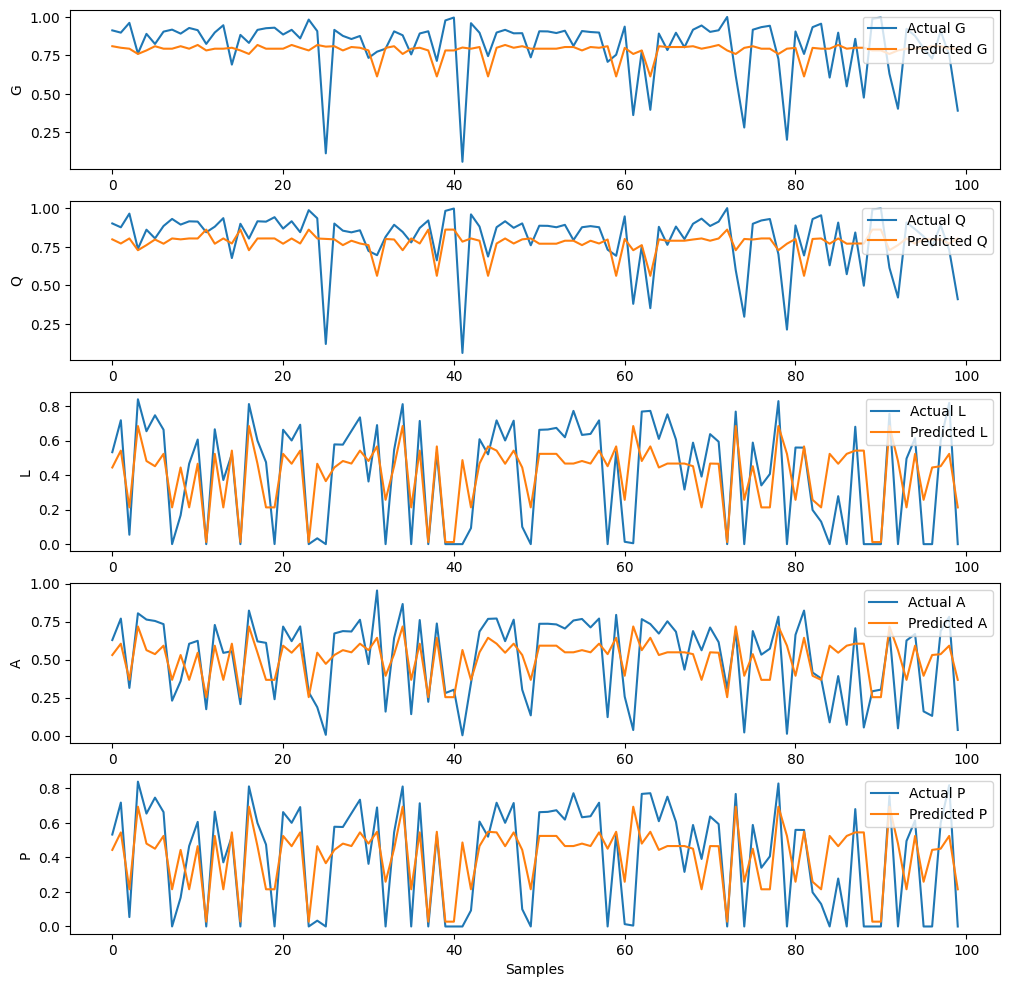

In [11]:
# Improved visualization for actual vs predicted values
plt.figure(figsize=(12, 12))
sample_range = 100  # Plot all test samples
for i, col in enumerate(output_cols):
    plt.subplot(len(output_cols), 1, i+1)
    plt.plot(y_test[:sample_range, i], label=f'Actual {col}')
    plt.plot(test_predictions[:sample_range, i], label=f'Predicted {col}')
    plt.ylabel(col)
    plt.legend(loc='upper right')
plt.xlabel('Samples')
plt.show()